<a href="https://colab.research.google.com/github/omar-shaaban742001/computer_vison_pytorch/blob/master/Traffic_signs_classification_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [148]:
import torch , torchvision
from torchvision import datasets , transforms

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path
import cv2


##Get the dataset
From: https://benchmark.ini.rub.de/gtsrb_dataset.html#Overview

In [149]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip

--2024-01-28 08:56:26--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip.3’

GTSRB_Final_Trainin 100%[===================>] 263.50M  18.3MB/s    in 16s     

2024-01-28 08:56:43 (16.6 MB/s) - ‘GTSRB_Final_Training_Images.zip.3’ saved [276294756/276294756]



In [150]:
#unzip the dataset
import zipfile

data_path = Path("data_images/")
image_path = data_path / "traffic_signs"

if image_path.is_dir():
  print("[INFO] The directory is already exsist.....")
else:
  with zipfile.ZipFile("/content/GTSRB_Final_Training_Images.zip" , "r") as zep_ref:
    print("Extracting the dataset")
    zep_ref.extractall(image_path )


[INFO] The directory is already exsist.....


In [151]:
import os
#Travese through the dataset
for dirpath, dirnames, filenames in os.walk(data_path):
  print(f"There ara {len(dirnames)} diractories and {len(filenames)} images in {dirpath}.")

There ara 1 diractories and 0 images in data_images.
There ara 1 diractories and 0 images in data_images/traffic_signs.
There ara 1 diractories and 1 images in data_images/traffic_signs/GTSRB.
There ara 1 diractories and 0 images in data_images/traffic_signs/GTSRB/Final_Training.
There ara 43 diractories and 0 images in data_images/traffic_signs/GTSRB/Final_Training/Images.
There ara 0 diractories and 421 images in data_images/traffic_signs/GTSRB/Final_Training/Images/00016.
There ara 0 diractories and 241 images in data_images/traffic_signs/GTSRB/Final_Training/Images/00042.
There ara 0 diractories and 421 images in data_images/traffic_signs/GTSRB/Final_Training/Images/00006.
There ara 0 diractories and 1201 images in data_images/traffic_signs/GTSRB/Final_Training/Images/00018.
There ara 0 diractories and 511 images in data_images/traffic_signs/GTSRB/Final_Training/Images/00023.
There ara 0 diractories and 361 images in data_images/traffic_signs/GTSRB/Final_Training/Images/00040.
Ther

##Exploration

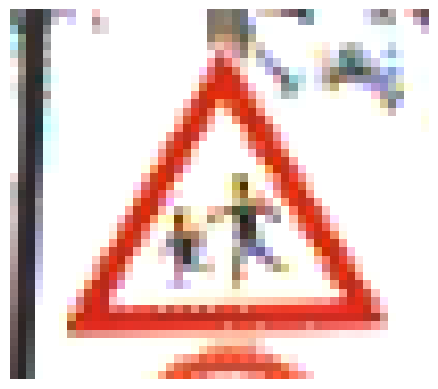

In [152]:
import random
import glob
path_images = Path("/content/data_images/traffic_signs/GTSRB/Final_Training/Images")

#get the dataset into a list
images = list(path_images.glob("*/*.ppm"))

#get an image from the list
random_image = cv2.cvtColor(cv2.imread(str(random.choice(images))), cv2.COLOR_BGR2RGB)
#show the image
plt.imshow(random_image)
plt.axis(False);

##Build a small dataset


In [153]:
#the most used dataset
Class_names = ['priority_road', 'give_way', 'stop', 'no_entry']

class_indices = [12, 13, 14, 17]

##Customize the dataset to be suitable for ImageFolder

In [154]:
data_path = Path("data/Traffic_signs")

subset = ["Train" , "Test"]

for sub in subset:
  for cls in class_names:
    (data_path / sub / cls).mkdir(parents = True , exist_ok = True)

In [155]:
def get_ppm_files(source):
    # Get a list of all files in the source directory
    all_files = os.listdir(source)

    # Filter files that end with ".ppm"
    ppm_files = [file for file in all_files if file.endswith(".ppm")]

    return ppm_files


In [156]:
import shutil

def split(source, destination_train , destination_test):

  # List all files in the source directory
  all_files = get_ppm_files(source)

  # Shuffle the list of files
  random.shuffle(all_files)

  # Calculate the split index
  split_index = int(len(all_files) * 0.8)

  # Split the list into training and testing sets
  train_set = all_files[:split_index]
  test_set = all_files[split_index:]

  # Copy files to the destination
  for filename in train_set:
    shutil.copy(source +"/" +filename, destination_train)

    # Copy files to the destination
  for filename in test_set:
    shutil.copy(source +"/"+filename, destination_test)

In [157]:
# Example usage
split(source="/content/data_images/traffic_signs/GTSRB/Final_Training/Images/00012",
      destination_train="/content/data/Traffic_signs/Train/priority_road",
      destination_test = "/content/data/Traffic_signs/Test/priority_road")

In [158]:
# Example usage
split(source="/content/data_images/traffic_signs/GTSRB/Final_Training/Images/00013",
      destination_train="/content/data/Traffic_signs/Train/give_way",
      destination_test = "/content/data/Traffic_signs/Test/give_way")

# Example usage
split(source="/content/data_images/traffic_signs/GTSRB/Final_Training/Images/00014",
      destination_train="/content/data/Traffic_signs/Train/stop",
      destination_test = "/content/data/Traffic_signs/Test/stop")

# Example usage
split(source="/content/data_images/traffic_signs/GTSRB/Final_Training/Images/00017",
      destination_train="/content/data/Traffic_signs/Train/no_entry",
      destination_test = "/content/data/Traffic_signs/Test/no_entry")

In [159]:
# import shutil

# # Replace '/content/drive/MyDrive/YourFolder' with the path to the folder you want to delete
# folder_path = '/content/data_images'

# # Delete the folder and its contents
# shutil.rmtree(folder_path)

In [160]:
import random
from PIL import Image
def plot_images(source:str):
  images = list(Path(source).glob("*.ppm"))
  # 2. Get random image path
  random_image_path = random.choice(images)

  # 3. Get image class from path name (the image class is the name of the directory where the image is stored)
  image_class = random_image_path.parent.stem

  # 4. Open image
  img = Image.open(random_image_path)

  # 5. Print metadata
  print(f"Random image path: {random_image_path}")
  print(f"Image class: {image_class}")
  print(f"Image height: {img.height}")
  print(f"Image width: {img.width}")
  plt.imshow(img)

  return img

Random image path: /content/data/Traffic_signs/Train/priority_road/00068_00011.ppm
Image class: priority_road
Image height: 37
Image width: 35


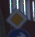

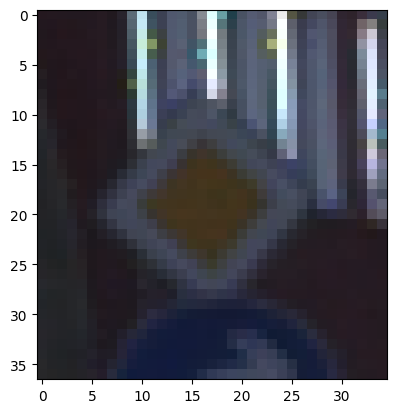

In [161]:
plot_images("/content/data/Traffic_signs/Train/priority_road")

##Creat dataloader

In [162]:
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models._api import WeightsEnum
from torch.hub import load_state_dict_from_url

def get_state_dict(self, *args, **kwargs):
    kwargs.pop("check_hash")
    return load_state_dict_from_url(self.url, *args, **kwargs)
WeightsEnum.get_state_dict = get_state_dict


#Get an instant form the efficient net model
weights_effinet = EfficientNet_B0_Weights.DEFAULT
effinet_model = efficientnet_b0(weights=weights_effinet)

#Get an instant form the Resnet model
weights_resnet = ResNet50_Weights.DEFAULT
resnet_model = resnet50(weights = weights_resnet)



In [163]:
train_dir = "/content/data/Traffic_signs/Train"
test_dir = "/content/data/Traffic_signs/Test"

In [164]:
from torch.utils.data import DataLoader
def creat_dataloader(train_dir : str,
                    test_dir :str,
                    batch_size :int,
                    transfrom):
  # Use ImageFolder to create dataset(s)
  train_data = datasets.ImageFolder(root = train_dir,
                                    transform=transfrom)

  test_data = datasets.ImageFolder(root = test_dir,
                                    transform=transfrom)


  class_names = train_data.classes
  #creat dataloader
  train_dataloader = DataLoader(train_data,
                               batch_size = batch_size,
                               shuffle = True,
                               pin_memory=True)

  test_dataloader = DataLoader(test_data,
                               batch_size = batch_size,
                               shuffle = False,
                               pin_memory=True)


  return train_dataloader, test_dataloader, class_names

In [165]:
train_dataloader , test_dataloader , class_names = creat_dataloader(train_dir=train_dir,
                                                                    test_dir = test_dir,
                                                                    batch_size = 4,
                                                                    transfrom = weights_effinet.transforms())

train_dataloader , test_dataloader , class_names

(<torch.utils.data.dataloader.DataLoader at 0x7bffde364a00>,
 ['give_way', 'no_entry', 'priority_road', 'stop'])

In [166]:
#setup device agnostic code
device  = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [167]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device = device):

  # Put model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  for batch , (X ,y) in  enumerate(dataloader):
    #setup data to the right device
    X , y = X.to(device) , y.to(device)

    #forward pass
    y_pred = model(X)

    #calculate the loss
    loss = loss_fn(y_pred , y)
    train_loss += loss.item()

    #set optimzer to zerograd
    optimizer.zero_grad()

    #Loss backward
    loss.backward()

    #take a step
    optimizer.step()

    # Calculate and accumulate accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device):

  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.no_grad():
      # Loop through DataLoader batches
      for batch, (X, y) in enumerate(dataloader):
          # Send data to target device
          X, y = X.to(device), y.to(device)

          # 1. Forward pass
          test_pred_logits = model(X)

          # 2. Calculate and accumulate loss
          loss = loss_fn(test_pred_logits, y)
          test_loss += loss.item()

          # Calculate and accumulate accuracy
          test_pred_labels = test_pred_logits.argmax(dim=1)
          test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc


In [168]:
from tqdm.auto import tqdm
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          loss_fn:torch.nn.Module,
          optimizer:torch.optim,
          epochs:int,
          device = device):

  # Create empty results dictionary
  results = {"train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }
  # Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                        dataloader=train_dataloader,
                                        loss_fn=loss_fn,
                                        optimizer=optimizer,
                                        device=device)
    test_loss, test_acc = test_step(model=model,
        dataloader=test_dataloader,
        loss_fn=loss_fn,
        device=device)

    # Print out what's happening
    print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
      )

    # Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the filled results at the end of the epochs
  return results

##Prepare models for the trainig

In [169]:
#Get an instant form the efficient net model
weights_effinet = EfficientNet_B0_Weights.DEFAULT
effinet_model = efficientnet_b0(weights=weights_effinet).to(device)
effinet_model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [170]:
!pip install -q torchinfo
from torchinfo import summary


In [171]:
summary(effinet_model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [172]:
effinet_model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [173]:
#setup the feature extraction to false
for param in effinet_model.features.parameters():
  param.requires_grad = False

output_shape = len(class_names)

# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Recreate the classifier layer and seed it to the target device
effinet_model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [174]:
summary(effinet_model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 4]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

##EfficientNet

In [175]:
#setup the optimzer
optimizer = torch.optim.Adam(effinet_model.parameters() , lr = 0.001)

#setup the loss function
loss_fn = torch.nn.CrossEntropyLoss()

In [176]:
from timeit import default_timer as timer
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#setup the timer
start_time = timer()

#train the model
results = train(model = effinet_model,
                train_dataloader = train_dataloader,
                test_dataloader = test_dataloader,
                loss_fn = loss_fn,
                optimizer = optimizer,
                epochs= 5,
                device = device)


#setup the end timeer
end_time = timer()

#print the time for out model
print(f"Efficient model took {end_time - start_time:0.3f} to train the dataset..")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.3908 | train_acc: 0.8684 | test_loss: 0.1301 | test_acc: 0.9752
Epoch: 2 | train_loss: 0.2549 | train_acc: 0.9091 | test_loss: 0.2196 | test_acc: 0.9340
Epoch: 3 | train_loss: 0.2370 | train_acc: 0.9213 | test_loss: 0.1429 | test_acc: 0.9575
Epoch: 4 | train_loss: 0.2381 | train_acc: 0.9143 | test_loss: 0.1330 | test_acc: 0.9618
Epoch: 5 | train_loss: 0.2054 | train_acc: 0.9297 | test_loss: 0.1031 | test_acc: 0.9678
Efficient model took 314.572 to train the dataset..


##ResNet



In [177]:
#Get an instant form the Resnet model
weights_resnet = ResNet50_Weights.DEFAULT
resnet_model = resnet50(weights = weights_resnet)
resnet_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [178]:
train_dataloader , test_dataloader , class_names = creat_dataloader(train_dir=train_dir,
                                                                    test_dir = test_dir,
                                                                    batch_size = 4,
                                                                    transfrom = weights_resnet.transforms())

train_dataloader , test_dataloader , class_names

(<torch.utils.data.dataloader.DataLoader at 0x7bffdca47820>,
 ['give_way', 'no_entry', 'priority_road', 'stop'])

In [179]:
summary(resnet_model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 1000]           --                   True
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   9,408                True
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   128                  True
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   True
│    └─Bottleneck (0)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   True
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     4,096                True
│    │    └─BatchN

In [180]:
# Freeze all layers except the fully connected (fc) layer
for name, param in resnet_model.named_parameters():
    if not name.startswith('fc'):
        param.requires_grad = False

In [181]:
resnet_model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [182]:
#make the fc layer sauitable for out problem
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)
resnet_model.fc = torch.nn.Linear(in_features=2048, out_features=output_shape, bias=True).to(device)


In [183]:
summary(resnet_model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 4]              --                   Partial
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   (9,408)              False
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   (128)                False
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    └─Bottleneck (0)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     (4,096)              False
│    │    

In [184]:
from timeit import default_timer as timer
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#setup the timer
start_time = timer()

#train the model
results = train(model = resnet_model,
                train_dataloader = train_dataloader,
                test_dataloader = test_dataloader,
                loss_fn = loss_fn,
                optimizer = optimizer,
                epochs= 5,
                device = device)


#setup the end timeer
end_time = timer()

#print the time for out model
print(f"Efficient model took {end_time - start_time:0.3f} to train the dataset..")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.3811 | train_acc: 0.3305 | test_loss: 1.3809 | test_acc: 0.3402
Epoch: 2 | train_loss: 1.3796 | train_acc: 0.3414 | test_loss: 1.3717 | test_acc: 0.3653
Epoch: 3 | train_loss: 1.3810 | train_acc: 0.3369 | test_loss: 1.3836 | test_acc: 0.3252
Epoch: 4 | train_loss: 1.3806 | train_acc: 0.3333 | test_loss: 1.3815 | test_acc: 0.3272
Epoch: 5 | train_loss: 1.3816 | train_acc: 0.3286 | test_loss: 1.3835 | test_acc: 0.3381
Efficient model took 295.503 to train the dataset..


In [211]:
# 1. Take in a trained model, class names, image path, image size, a transform and target device
from typing import List, Tuple

from PIL import Image

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):


    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ###

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

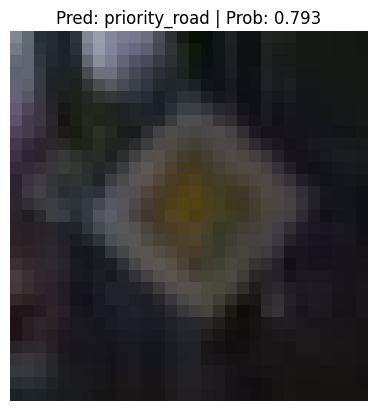

In [239]:
test_dir = "/content/data/Traffic_signs/Test"

list_of_images = list(Path(test_dir).glob("*/*.ppm"))
random_image_path = random.choice(list_of_images)

# Specify the path for the converted JPEG image
output_image_path = random_image_path

# Open the PPM image using PIL
image = Image.open(random_image_path)

# Convert the image to RGB format (JPEG format requires RGB)
image_rgb = image.convert("RGB")

# Save the converted image as JPEG
image_rgb.save(output_image_path, format="JPEG")

pred_and_plot_image(model =effinet_model,
                    image_path =output_image_path,
                    class_names = class_names,
                    device = device)